In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from diffusion import Unet, GaussianDiffusion, Trainer, Dataset, SimpleDataset
device = 'cuda:3'

import matplotlib.pyplot as plt
import torch

In [3]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 2, 4, 4, 8, 8)
).to(device)

diffusion = GaussianDiffusion(
    model,
    timesteps = 1000,   # number of steps
    loss_type = 'l1+l2'    # L1 or L2
).to(device)

lr = 2e-5
steps = 5000

trainer = Trainer(
    diffusion,
    '../../cats/',
    image_size = 128,
    train_batch_size = 32,
    train_lr = lr,
    train_num_steps = 500000,         # total training steps
    gradient_accumulate_every = 1,    # gradient accumulation steps
    ema_decay = 0.999,                # exponential moving average decay
    fp16 = False,                       # turn on mixed precision training with apex
    results_folder = './results_128_deep'
)

In [4]:
trainer.load('model-330000.pt') # <step> = # in the name

Loading from results_128_deep/model-330000.pt


In [5]:
d = Dataset('../../cats', 128)
seeded_images = torch.cat([d[x].unsqueeze(0) for x in [1, 2, 3, 4]], dim=0).to(device)

In [6]:
samples=4
noise = torch.randn(samples, 3, 128, 128).to(device)

In [7]:
# Random noise mask
mask = torch.full_like(seeded_images, 0, dtype=bool)
mask[torch.rand_like(seeded_images) < .3] = 1
mask = mask.to(device)

all_images_list = list(map(lambda n: trainer.ema_model.sample(128, batch_size=4, noise=seeded_images, mask=mask), [4]))
all_images = torch.cat(all_images_list, dim=0)

sampling loop time step: 100%|██████████| 1000/1000 [00:22<00:00, 44.80it/s]


In [ ]:
# Unconditional generation

all_images_list = list(map(lambda n: trainer.ema_model.sample(128, batch_size=4, noise=noise, mask=None), [4]))
all_images = torch.cat(all_images_list, dim=0)

In [15]:
# Box mas
mask = torch.full_like(seeded_images, 1, dtype=bool)
_, _, h, w = mask.shape
# mask[:, :, 0:h//2, :] = 0
mask[:, :, h*30//100:h*52//100, w*17//100:w*83//100] = 0
mask[:, :, h*30//100:h*52//100, w*42//100:w*58//100] = 1
# mask[:, :, h*20//100:h*80//100, w*20//100:w*80//100] = 0
# mask[:, :, h*30//100:h*70//100, w*30//100:w*70//100] = 1
# mask[:, :, h*40//100:h*60//100, w*40//100:w*60//100] = 0
# mask[:, :, h*45//100:h*55//100, w*45//100:w*55//100] = 1
# mask[:, :, h*25//100:h*75//100, w*24//100:w*75//100] = 1
mask = mask.to(device)

all_images_list = list(map(lambda n: trainer.ema_model.sample(128, batch_size=4, noise=seeded_images, mask=mask), [4]))
all_images = torch.cat(all_images_list, dim=0)

[autoreload of diffusion failed: Traceback (most recent call last):
  File "/home/ericryanchan/environments/diffusion/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/ericryanchan/environments/diffusion/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/ericryanchan/environments/diffusion/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/ericryanchan/environments/diffusion/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/ericryanchan/environments/diffusion/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/ericryanchan/environments/diffusion/lib/python3.6/site-packag

In [16]:
output_images = all_images.reshape(-1, 4, 3, 128, 128).permute(1, 0, 2, 3, 4).reshape(-1, 3, 128, 128)
output_images = [img.permute(1, 2, 0).detach().cpu() for img in output_images]

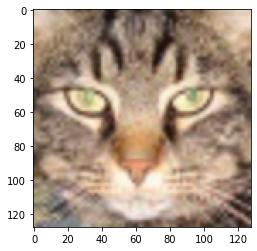

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


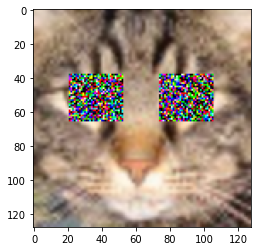

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


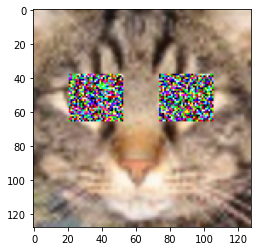

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


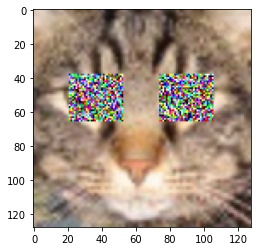

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


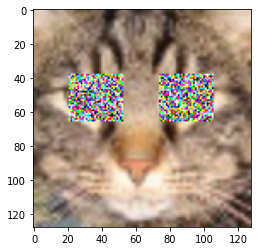

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


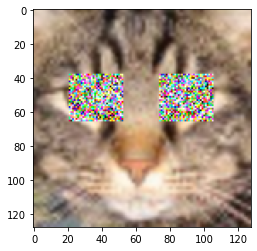

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


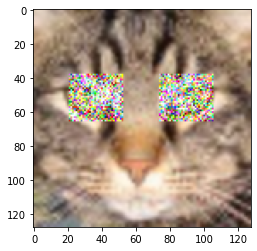

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


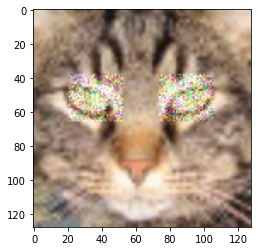

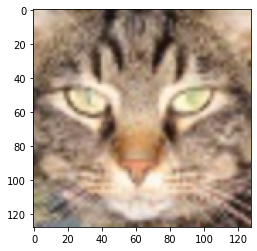

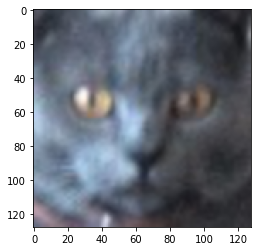

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


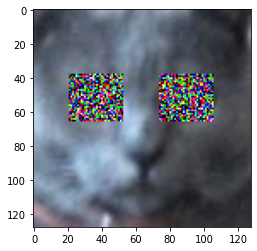

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


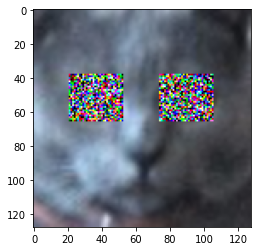

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


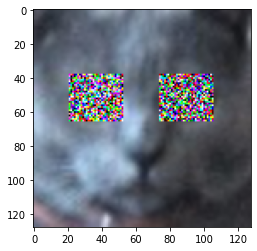

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


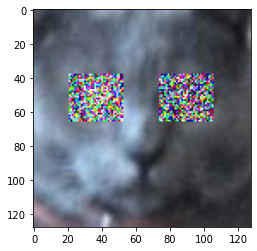

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


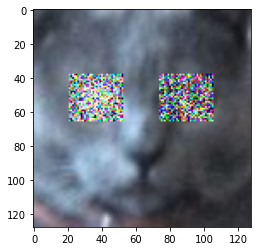

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


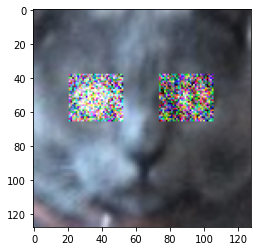

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


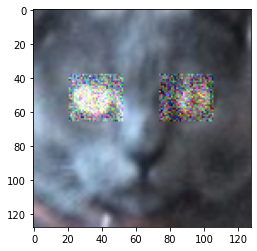

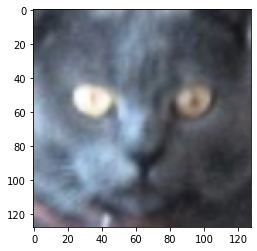

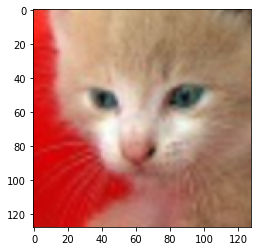

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


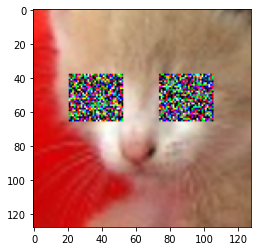

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


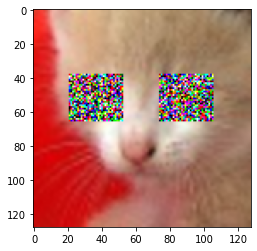

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


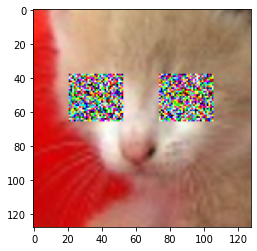

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


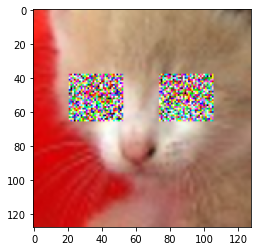

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


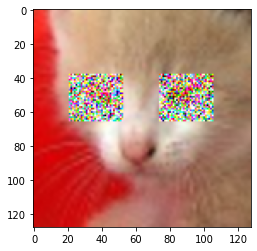

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


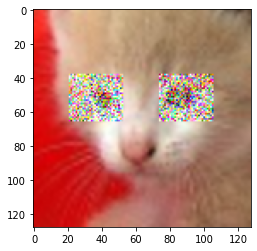

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


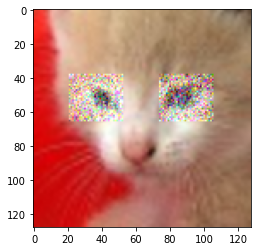

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


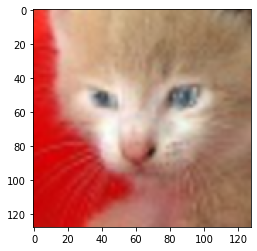

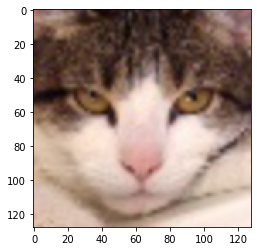

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


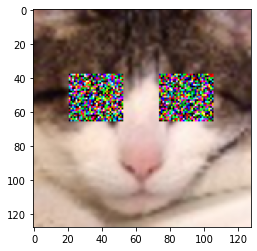

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


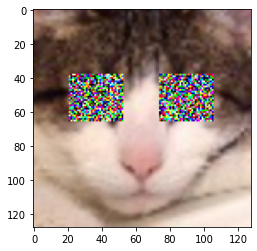

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


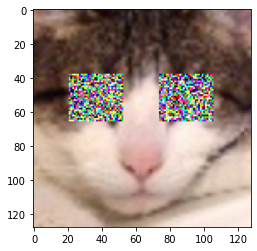

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


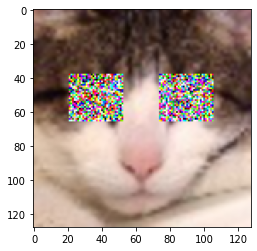

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


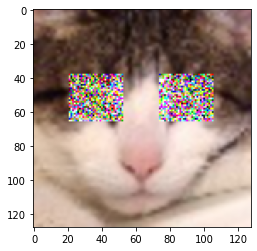

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


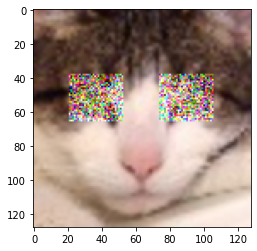

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


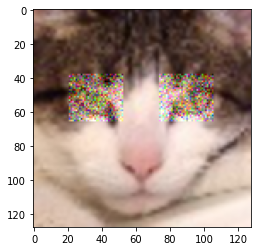

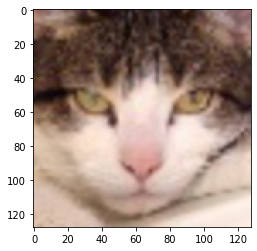

In [17]:
for x in output_images:
    plt.imshow(x)
    plt.show()

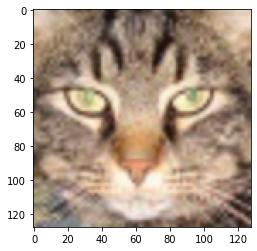

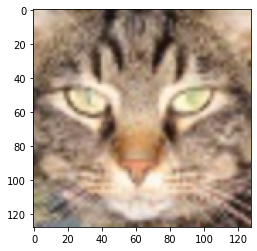

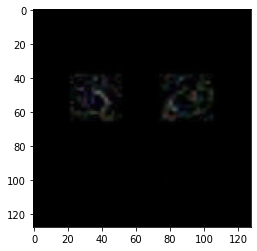

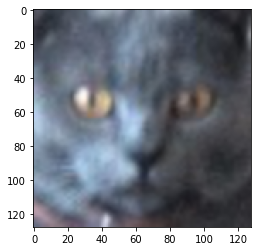

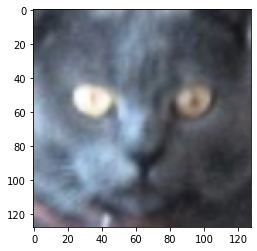

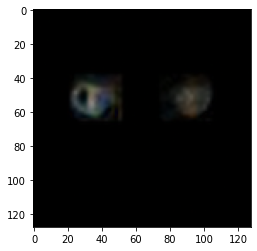

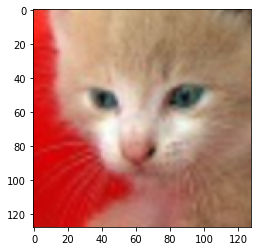

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


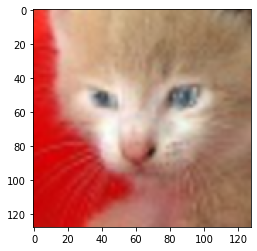

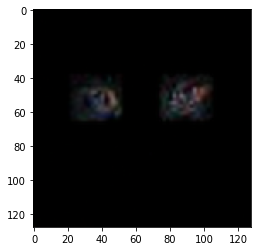

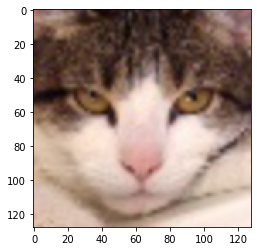

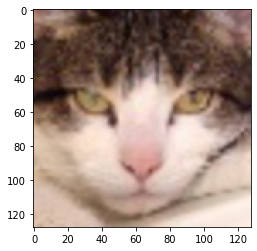

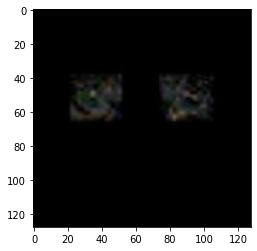

In [18]:
for i in range(0, 4):
    plt.imshow(output_images[9*i])
    plt.show()
    plt.imshow(output_images[9*i + 8])
    plt.show()
    plt.imshow((output_images[9*i] - output_images[9*i + 8]).abs())
    plt.show()
